<a href="https://colab.research.google.com/github/GoTudering/Deep_Learning_Study/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>차원과 차원 축소</h1>

<h3>차원 dimension</h3>
차원이란 특성의 개수

<h3>차원 축소 dimensionality reduction</h3>
차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법

또한 줄어든 차원에서 다시 우너본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음

대표적인 알고리즘으로 **주성분 분석 principal component analysis** 즉, **PCA**가 있음

<h2> PCA 클래스 </h2>

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2021-10-12 08:25:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-12 08:25:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-12 08:25:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

사이킷런은 sklearn.decomposition 모듈 아래 PCA클래스로 주성분 분석 알고리즘을 제공함

PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야함

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있음

In [3]:
print(pca.components_.shape)

(50, 10000)


50개의 주성분을 찾음

두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000임

이제 주성분을 그려볼 건데 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr) #n은 샘플 개수
  #한 줄에 10개씩 이미지를 그림 샘플 개수가 10으로 나누어 전체 행 개수를 계산
  rows = int(np.ceil(n/10))
  #행이 1개이면 열의 개수는 샘플 개수 그렇지 않으면 10개임
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows,cols,
                          figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n: #n개까지만 그림
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

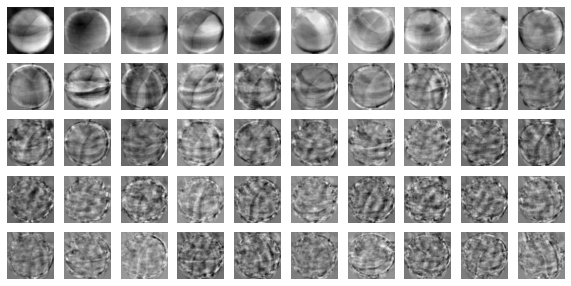

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음

PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄이자

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


<h2> 원본 데이터 재구성 </h2>

최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있음

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공함

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


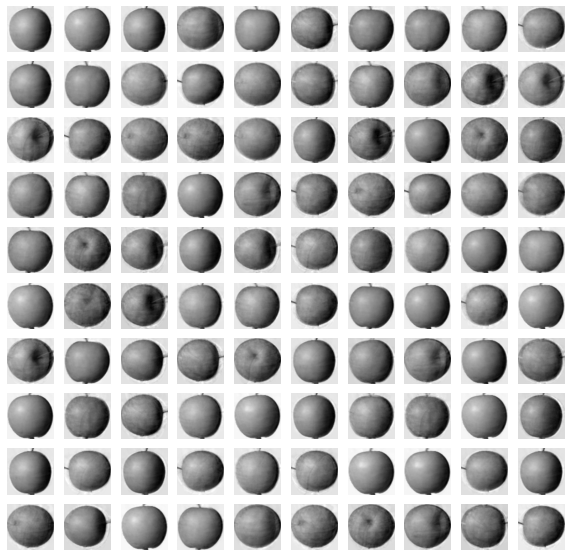

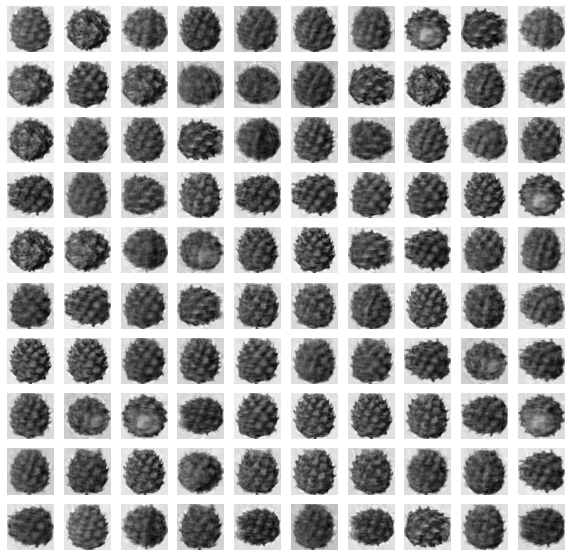

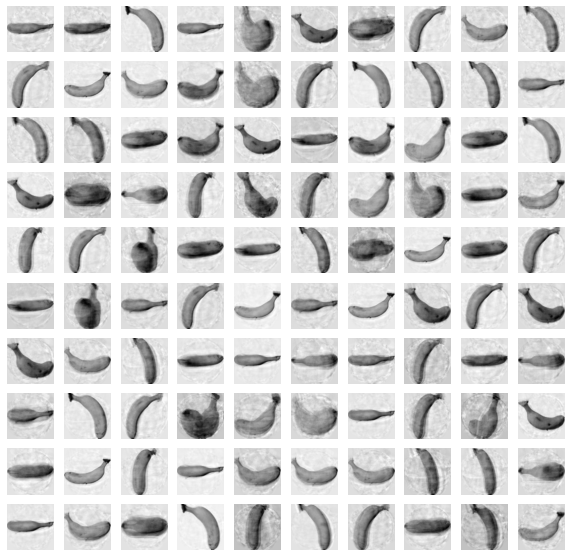

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

<h2> 설명된 분산 explained variance </h2>
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 의미

PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록되어 있음

당연히 첫 번째 주성분의 설명된 분산이 가장 큼

이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215168353971113


설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 됨

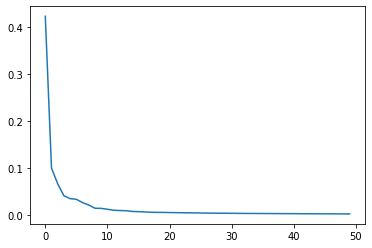

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

<h2> 다른 알고리즘과 함께 사용하기 </h2>

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아야 함

3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 하니 사과를 0 파인애플을 1 바나나를 2로 지정함

In [14]:
target = np.array([0]*100+[1]*100+[2]*100)

먼저 원본 데이터인 fruits_2d를 사용하겠음

로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증을 수행

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4584277629852296


PCA로 축소한 fruits_pca를 사용

In [16]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.027293014526367187


앞서 PCA 클래스를 사용할 때 n_component 매개변수에 주성분의 개수를 지정했음

이 대신에 원하는 설명된 분산의 비율을 입력할 수도 있음

In [17]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print(pca.n_components_)

2


이 모델로 원본 데이터를 변환해봄

In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04457864761352539


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


앞의 결과 값을 보면 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고(Convergencd Warning: lbfgs failed to converge가 출력됨

하지만 교차 검증의 겨과가 충분히 좋기 때문에 무시해도 좋음


이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아봄

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


결과 값이 원본 데이터를 사용했을 때와 거의 비슷함

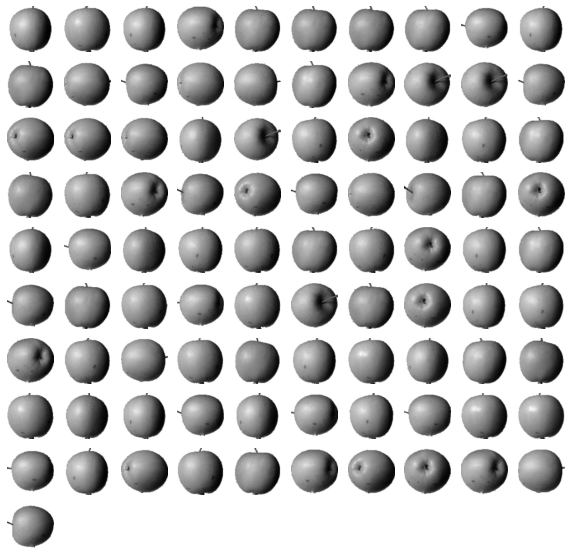

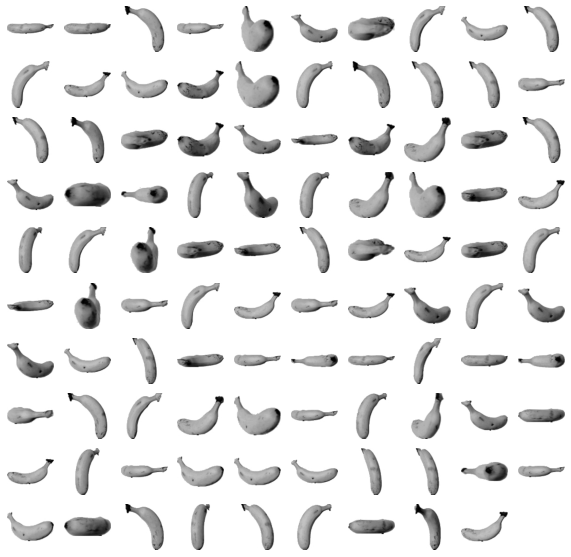

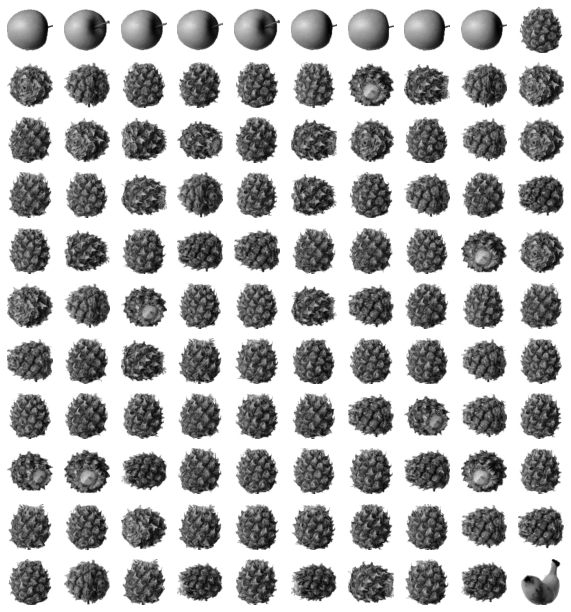

In [24]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 **시각화**

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있음

앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려봄

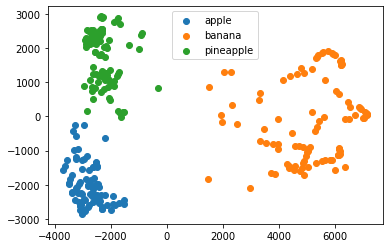

In [26]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()